# $\ell_p$-norms

#### by Z.Y. Teoh, April 29, 2023

##### Dedicated to the memory of Ollie, a kitten I rescued and successfully sent out for adoption, but who passed away a week after his surgery, at age 1 year 5 months, on May 2, 2023.

$\ell_p$-spaces are the cornerstone of modern mathematics, both pure and applied. $\ell_p$-norm plays an important role in the modern digital world we live in today. For example, a salient feature of machine learning is to avoid over-fitting or under-fitting. This is achieved by calibrating the $\ell_1$-norm and $\ell_2$-norm contributions to the penalty function. The $\ell_1$-norm is robust to outliers while the $\ell_2$-norm (the usual, least-square regression norm) is not, and a good fit must be able to discern the difference between an outlier or otherwise. (See Subsection 3.5, Reference 1.) We will not discuss this topic in length in this note, but instead to study some basic properties of the $\ell_p$-norm as well as other commonly studied-along inequalities. We do all these in the context of both theoretical and computational explorations.

**Definition.** For a sequence $\vec{a}$, finite or infinite, the $\ell_p$-norm of the sequence for $p>0$ is defined by
\begin{equation}
    \left\lVert\vec{a}\right\rVert_p=\left(\sum a_i^p\right)^{1/p},
\end{equation}
where $n$ either denotes the length of the finite sequence or $\infty$ in the case of an infinite sequence.

In the simulation below, we look at the $\ell_p$-norms of sequences of length 5 for $p=1, 2, \ldots, 20$. Terms of the sequences are generated randomly and are restricted to numbers between 20 and 70 for simplicity. Each simulation plots the twenty $\ell_p$-norms of the randomly chosen sequence. You may change length of the sequence or the range of values the terms of the sequence may assume. The red dashed line represents the largest term in the sequence.

p = 1
norm = 258.0
p = 2
norm = 118.80235687897779
p = 3
norm = 93.24389675115471
p = 4
norm = 83.41526708426407
p = 5
norm = 78.49557798011813
p = 6
norm = 75.66872241533869
p = 7
norm = 73.89708043162088
p = 8
norm = 72.71684015874364
p = 9
norm = 71.89347427098706
p = 10
norm = 71.29776703735153
p = 11
norm = 70.85384200044453
p = 12
norm = 70.51486753007289
p = 13
norm = 70.25073813583333
p = 14
norm = 70.04142259556805
p = 15
norm = 69.87318759953713
p = 16
norm = 69.73636432788608
p = 17
norm = 69.62398149232146
p = 18
norm = 69.53090369419276
p = 19
norm = 69.45327404132874
p = 20
norm = 69.38814507220948


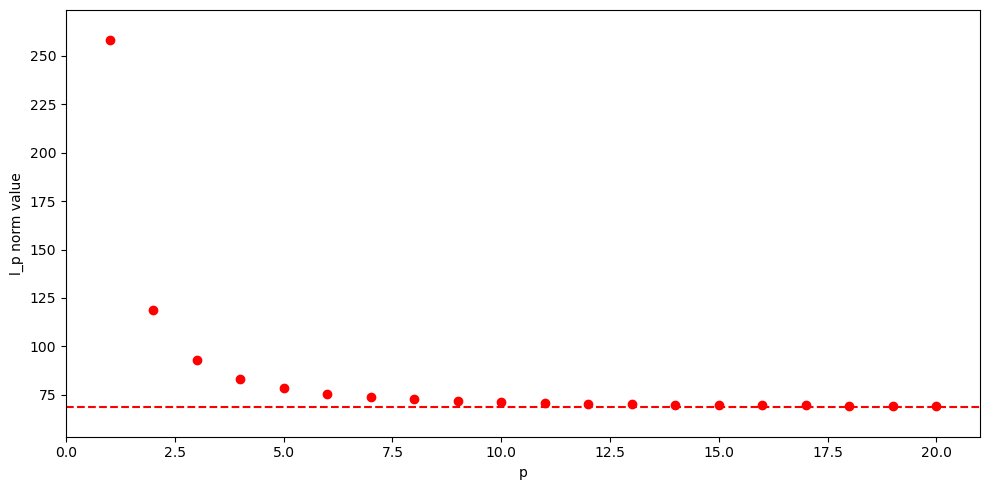

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

## If you want to use your own sequence, uncomment the next line and comment out the randomlist generator below.
randomlist = [69, 62, 48, 33, 46]

# randomlist = []
# for i in range(0,5): #The length of the sequence is set at 5 in default. Change the 5 to a length you wish.
#         n = random.randint(20,70)  #The (20, 70) is the range of values the terms may assume. Change to a range you wish.
#         randomlist.append(n)
# print("Let's explore the l_p norms of the vector", randomlist)

def lp(randomlist, p):
    return (sum((randomlist[i])**p for i in range(0, 5)))**(1/p)

p=1
X = []
Y = []
while p<21: #You may change p to see the number of different l_p norms you wish.
    print("p =",p) #Comment this out if you don't want to see the actualy p and the actual l_p-norm.
    print("norm =", lp(randomlist, p)) #Comment this out if you don't want to see the actualy p and the actual l_p-norm.
    X.append(p)
    Y.append(lp(randomlist, p))
    p=p+1

rn = (lp(randomlist, 1)-lp(randomlist, 10))/12

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
    
plt.plot(X, Y, 'ro')
plt.xlabel('p')
plt.ylabel('l_p norm value')
plt.axis([0, p, max(randomlist)-rn, lp(randomlist, 1)+rn])

plt.axhline(y=max(randomlist), color='red', linestyle='--', label=f'largest term {max(randomlist)}')

plt.show()


## You may also want to comment out the random number generator and insert your own sequences.
# Below are some example sequences.
# [27, 36, 69, 68, 68]
# [46, 31, 42, 67, 42]
# [63, 66, 61, 59, 44]
# [62, 57, 68, 40, 23]

The simulation above suggests that the greater $p$ is, the smaller is the $\ell_p$-norm and the norms approaches the largest of the terms in the sequence $\vec{a}$. We want to prove this fact, namely if $p>q$, then
\begin{equation*}
    \left\lVert\vec{a}\right\rVert_p=\left(\sum a_i^p\right)^{1/p}\leq\left(\sum a_i^q\right)^{1/q}=\left\lVert\vec{a}\right\rVert_q.
\end{equation*}
Thus, let $\vec{a}=\langle a_1, a_2, \ldots, a_n, \ldots\rangle$ be such a sequence such that $\sum a_i^q<\infty$, which is not an issue at all if the sequence is finite (or, equivalently, it has a tail consisting of zeros).

To do that, we will make use of the fact that if $c$ is a nonzero number, then
\begin{equation*}
    \left(\sum\left(\frac{a_i}{c}\right)^s\right)^{1/s}=\frac{1}{c}\left(\sum a_i^s\right)^{1/s}
\end{equation*}
for any nonzero $s$, which can be easily verified. For the purpose of our computation, we set $c=\left\lVert\vec{a}\right\rVert_q$ and take note that no term of the sequence is greater than $c$, which means that
\begin{equation*}
    \left(\frac{a_j}{c}\right)^s\leq 1
\end{equation*}
for all $j$. Thus, if $p>q$, we have
\begin{equation*}
    \left(\frac{a_i}{c}\right)^p\leq\left(\frac{a_i}{c}\right)^q
\end{equation*}
and so
\begin{equation*}
    \sum a_i^p=c^p\sum\left(\frac{a_i}{c}\right)^p\leq c^p\sum\left(\frac{a_i}{c}\right)^q=\frac{c^p}{c^q}\sum a_i^q=\frac{c^p}{c^q}\cdot c^q=c^p
\end{equation*}
whereby
\begin{equation*}
    \left\lVert\vec{a}\right\rVert_p=\left(\sum a_i^p\right)^{\frac{1}{p}}\leq c=\left\lVert\vec{a}\right\rVert_q,
\end{equation*}
as to be shown.

The next thing we want to show is that $\left\lVert\vec{a}\right\rVert_\infty=\max\{a_i:i=1, 2, \ldots\}$; we are dealing with convergent series, so the sequence must converge to $0$, whereby a maximum element $\max\{a_i:i=1, 2, \ldots\}$ exists. To be more precise, we will show that $\displaystyle\lim_{s\to\infty}\left\{\left(\sum a_i^s\right)^{1/s}\right\}$ exists and is equal to $\max\{a_i:i=1, 2, \ldots\}$, which in view of the decreasing nature of the norm as $p$ increases, this is equivalent to showing that
\begin{equation}
    \inf_{s\geq q}\left(\sum a_i^s\right)^{1/s}=\max\{a_i:i=1, 2, \ldots\}.
\end{equation}
Now, since we are dealing with nonnegative sequences of numbers, we may rearrange the sequences in decreasing order and so, without loss of generality, we may assume that $a_0$ is the maximum element and is nonzero (else the situation is a trivial one). We now claim that, for $\gamma$ such that $a_0<\gamma\leq\left(a_0^s+\sum_{i=2}^\infty a_i^s\right)^{1/s}$, we can find $t>s$ such that $a_0<\left(a_0^t+\sum_{i=2}^\infty a_i^t\right)^{1/t}<\gamma$. For, if this were not true, then for each $t>s$, we would have
\begin{eqnarray*}
    a_0^t<\gamma^t\leq a_0^t+\sum_{i=2}^\infty a_i^t=a_0^t\left(1+\sum_{i=2}^\infty\left(\frac{a_i}{a_0}\right)^t\right)
\end{eqnarray*}
or
\begin{equation}
    1<\left(\frac{\gamma}{a_0}\right)^t\leq 1+\sum_{i=2}^\infty\left(\frac{a_i}{a_0}\right)^t.
\end{equation}
But it can be easily seen that the bigger $t$ is the bigger $(\gamma/a_0)^t$ will be while the smaller $\sum_{i=2}^\infty(a_i/a_0)^t$ will be, hence we can actually find a $t$ to refute the last inequality, thus showing that the claim is in fact true. The claim thus tells us that the sequence $\left(\sum_{i=1}^\infty a_i^{s_n}\right)^{1/s_n}$ is a decreasing sequence converging to $a_0$ for $1<s_1<s_2<\cdots$. Therefore,
\begin{eqnarray*}
    \lim_{s\to\infty}\left(\sum a_i^s\right)^{1/s} &=& \lim_{n\to\infty}\left(\sum a_i^{s_n}\right)^{1/s_n} \\
    &=& a_0,
\end{eqnarray*}
as we set out to prove.

Also, one notable pattern that we see from the plot is that the norm decreases either exponentially or in an inverse-power fashion. If $\vec{a}=\langle a_1\rangle$, a single-term sequence, all $\ell_p$ norm return $a_1$ and the value is a constant. It only becomes interesting when there are at least two terms, in which case we have $(a_1^p+a_2^p)^{1/p}$ and, in the case where $a_1=a_2=1$, we have $2^{1/p}$, whose graph clearly has the shape of the plot above. In fact, $\mathcal{O}(\left\lVert\vec{a}\right\rVert_p)=\sqrt[1/p]{n}$. For, suppose that $\vec{a}$ is a sequence with $n$ terms, whose largest terms is $M$, and whose least element is $m$. Then, for $p>q$, we have
\begin{equation}
    m\cdot\sqrt[1/p]{n}\leq\left\lVert\vec{a}\right\rVert_p\leq M\cdot\sqrt[1/p]{n}.
\end{equation}
The majorizing function is a good upper envelop because it shares the same horizontal asymptote as the norms $\left\lVert\vec{a}\right\rVert_p$, but the lower bound is not a good lower envelop because it approaches a different limit in general. A reasonable lower envelope with the same limit is $\left\lVert\vec{a}\right\rVert_\infty=M=\max\{a_i:i=1, 2, \ldots\}$. In fact, if $\vec{a}$ is constant, the majorizing function is the norm, $f(p)=M\cdot\sqrt[1/p]{n}=\left\lVert\vec{a}\right\rVert_p$. If we instead hold $a_1=M$ fixed (we may of course assume w.l.o.g. that the first term is the largest) and lower the values of the other terms, the graph of $F(a_2, a_3, \ldots, a_n; p)=\left\lVert\vec{a}\right\rVert_p$ for any fixed (but lowered) $a_2, a_3, \ldots, a_n$ is sandwiched between the horizontal line $a_1$ and $M\cdot\sqrt[1/p]{n}$.

If we work a little harder, we can get a better lower envelope. Let us seek a scaling-up factor $\alpha_p$ of $p$ such that $M\cdot n^{1/(\alpha_p p)}\leq\left\lVert\vec{a}\right\rVert_p$. The scale has a subscript $p$ because it potentially depends on $p$; this scale factor $\alpha_p$ exists because $M\cdot\sqrt[1/p]{n}$ majorizes $\left\lVert\vec{a}\right\rVert_p$ and both are decreasing functions in $p$. Let us compute:
\begin{eqnarray*}
    M\cdot n^{1/(\alpha p)}\leq\left\lVert\vec{a}\right\rVert_p &\Rightarrow&
    1/\alpha\leq\log_n\left[\sum_{i=1}^n\left(\frac{a_i}{M}\right)^p\right] \\
    \alpha &\geq& 1/\log_n\left[\sum_{i=1}^n\left(\frac{a_i}{M}\right)^p\right]
\end{eqnarray*}
If $M_2$ is the second largest term in the sequence, then we let $\alpha$ be such that
\begin{eqnarray}
    \alpha\geq 1/\log_n\left[1+\left(\frac{M_2}{M}\right)^p\right]\geq 1/\log_n\left[\sum_{i=1}^n\left(\frac{a_i}{M}\right)^p\right].
\end{eqnarray}
Hence, we may simply let $\alpha=1/\log_n\left[1+\left(\frac{M_2}{M}\right)^p\right]$.

We plot the norm with their envelopes in the plot below.

Once again, the sequence we are looking at is [69, 62, 48, 46, 33]
The least value in the sequence is m =  33
The greatest value in the sequence is M =  69
The second greatest value in the sequence is M2 =  62


(0.005, 21.0, 17.441480586445962, 273.55851941355405)

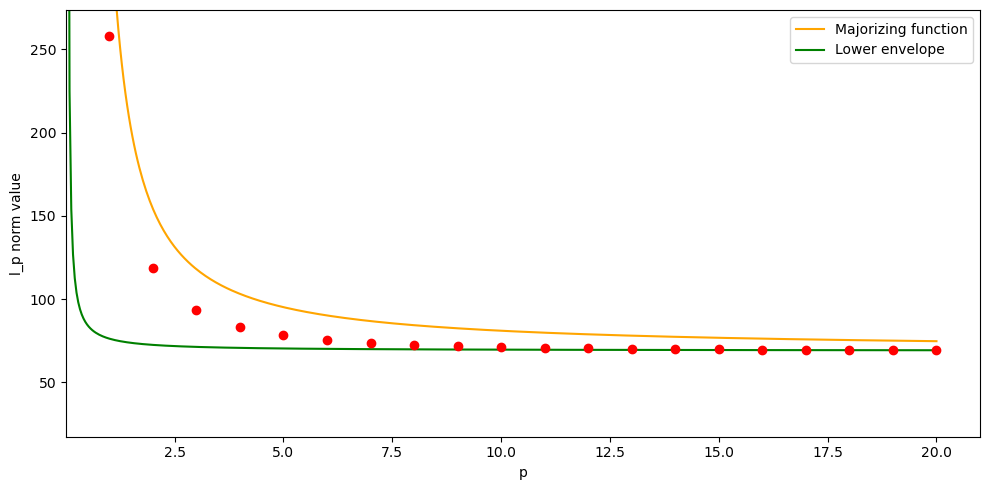

In [2]:
import math

randomlist = sorted(randomlist, reverse=True)
M = max(randomlist)
M2 = max(randomlist[1:])
alpha = 1/(math.log(1+((M2)/M)**p, 5))

print("Once again, the sequence we are looking at is", randomlist)
print("The least value in the sequence is m = ", min(randomlist))
print("The greatest value in the sequence is M = ", max(randomlist))
print("The second greatest value in the sequence is M2 = ", M2)


plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

# p-value range for smooth graphs. We start from p=0.005 since 1/p is undefined at 0.
p_smooth = np.linspace(0.005, 20, 500)

# The two enveloping functions
fmin = lambda p: min(randomlist)*(5**(1/p))
fmax = lambda p: M*(5**(1/p))
f_min = lambda p: M*(5**(1/(alpha*p)))


# Evaluate functions at new x-values
y1_smooth = np.vectorize(fmin)(p_smooth)
y2_smooth = np.vectorize(fmax)(p_smooth)
y3_smooth = np.vectorize(f_min)(p_smooth)

# # Plot original data and smooth graphs
# plt.plot(X, Y, 'ro', label='Original data')
plt.plot(p_smooth, y2_smooth, label='Majorizing function', color='orange')
plt.plot(p_smooth, y3_smooth, label='Lower envelope', color='green')
##Uncomment the next line if you'd like to see the lower bound using the term with the least value. 
# plt.plot(p_smooth, y1_smooth, label='Lowest term envolope', color='black', linestyle='--')

plt.legend()
    
plt.plot(X, Y, 'ro')
plt.xlabel('p')
plt.ylabel('l_p norm value')

#We start from p=0.005 since 1/p for the above is undefined at 0.
plt.axis([0.005, p, min(randomlist)-rn, lp(randomlist, 1)+rn])

### Jensen's Inequality

A _convex_ function $\varphi:D\to\mathbb{R}$ is a function such that $\varphi((1-t)a+tb)\leq(1-t)\varphi(a)+t\varphi(b)$ for each $a, b\in D\subseteq\mathbb{R}$ and $t\in[0, 1]$. A function is _concave_ if the inequality is reversed. For example, exponential functions are convex and logarithmic functions are concave. Other convex functions include $x^2$ and $x^3$ and other concave functions include $\sqrt{x}$ and $\sqrt[3]{x}$.

__Jenses's inequality__ states that, for convex functions $\varphi:D\to\mathbb{R}$, $x_1, x_2, \ldots, x_n\in D\subseteq\mathbb{R}$ and positive weights $a_1, a_2, \ldots, a_n\in\mathbb{R}$, we have
\begin{equation}
    \varphi\left(\frac{\sum_{i=1}^na_ix_i}{\sum_{i=1}^na_i}\right)\leq\frac{\sum_{i=1}^na_i\varphi(x_i)}{\sum_{i=1}^na_i}.
\end{equation}
The inequality can be quite easily established by induction. We will not go through the inductive step as it is a routine verification using basic inequalities, but nonetheless, the base step (where $i=2$) is established when $t=a_2/(a_1+a_2)$.

Jensesn's inequality gives rise to some common inequalities such as the AM-GM inequality. In this example, the convex function $\varphi(x)$ in question is any exponential function. The AM-GM inequality states that the arithmetic mean is always greater than or equal to the geometric mean of a sequence of nonnegative numbers $x_1, x_2, \ldots, x_n$. Let us use Jensen's inequality to prove this. We have
\begin{eqnarray}
\sqrt[n]{\prod_{i=1}^nx_i} &=& \exp\left(\ln\left(\sqrt[n]{\prod_{i=1}^nx_i}\right)\right)\;=\;\exp\left(\frac{1}{n}\ln\left(\prod_{i=1}^nx_i\right)\right)\;=\;\exp\left(\frac{1}{n}\left(\sum_{i=1}^n\ln x_i\right)\right) \\
&\leq& \frac{1}{n}\left(\sum_{i=1}^n\exp(\ln x_i)\right)=\frac{1}{n}\left(\sum_{i=1}^nx_i\right).
\end{eqnarray}

Some other interesting applications of Jensen's inequality are given in the Appendix.

### Young's Inequality

The application of Jensen's inequality we have in mind is **Young's inequality**. The inequality states that $ab\leq a^p/p+b^q/q$ whenever $a, b, p$, and $q$ are nonnegative numbers such that $1/p+1/q=1$. We again use any exponential function to achieve this result:
\begin{eqnarray}
    ab &=& (a^p)^{1/p}(b^q)^{1/q}\;=\;\exp\left(\ln\left((a^p)^{1/p}(b^q)^{1/q}\right)\right)\;=\;\exp\left(\frac{1}{p}\ln a^p+\frac{1}{q}\ln b^q\right) \\
    &\leq& \frac{\ln(\exp(a^p))}{p}+\frac{\ln(\exp(b^q))}{q}\;=\;\frac{a^p/p+b^q/q}{1/p+1/q}\;=\;\frac{a^p}{p}+\frac{b^q}{q}.
\end{eqnarray}

Materials about $l_p$-spaces or the $l_p$-norm are plenty out there, but as mentioned, this notebook is meant to be a numerical exploration opportunity and so let us begin with some exploration of numerical facts about Young's inequality and, as a complement, the AM-GM inequality. Let us begin by fixing $a=1$ and vary $b$. The resulting plot is $y=f(b)=b$ (green) vs. $y=g(b)=\frac{1}{p}+\frac{b^q}{q}$ (red).

Enter a positive value for p: 4
The value of q for your choice of p is  1.3333333333333333


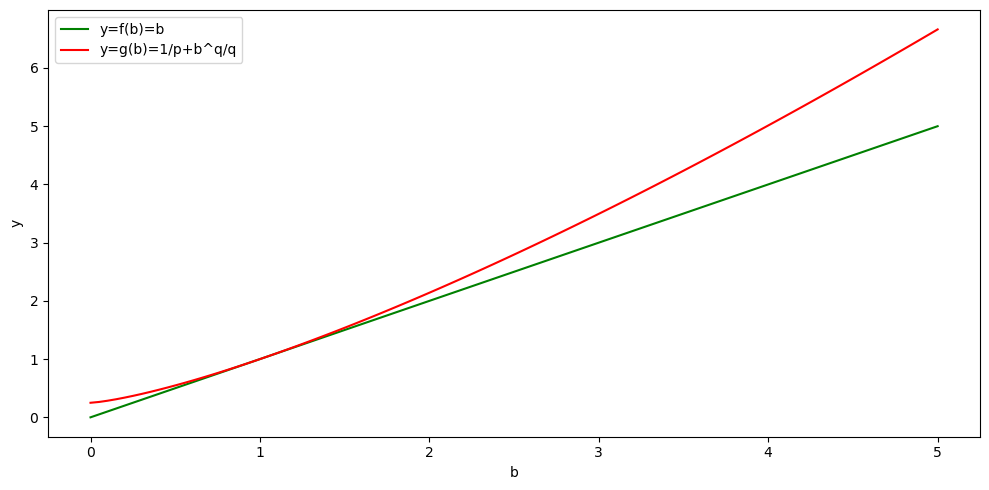

In [3]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

p = float(input('Enter a positive value for p: '))
q = p/(p-1)
print('The value of q for your choice of p is ',q)

def g(b):
    return 1/p+b**q/q
def f(b):
    return b

b = np.linspace(0, 5, 100)

plt.plot(b, f(b), color='green', label='y=f(b)=b')
plt.plot(b, g(b), color='red', label='y=g(b)=1/p+b^q/q')

plt.xlabel('b')
plt.ylabel('y')
plt.legend()

plt.show()

The individual graphs above can, of course, be easily sketched for anyone who has had some prealgebra, but deciding their relative positions would require more work. Young's inequality easily establishes their relative position.

### Hölder's Inequality

Hölder's inequality extends Young's inequality to two sequences of the same length. To be more precise, let $\vec{a}=\langle a_1, a_2, \ldots, a_n\rangle$ and $\vec{b}=\langle b_1, b_2, \ldots, b_n\rangle$ be sequences of nonnegative real numbers and let $p, q$ be positive number such that $1/p+1/q=1$. Then **Hölder's Inequality** states that
\begin{equation}
    \sum_{i=1}^na_ib_i\leq\left(\sum_{i=1}^na_i^p\right)^{\frac{1}{p}}\left(\sum_{i=1}^nb_i^q\right)^{\frac{1}{q}}
\end{equation}
or, in norm notation,
\begin{equation}
    \sum_{i=1}^na_ib_i\leq\left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q.
\end{equation}

For the proof, let
\begin{equation*}
\vec{\alpha}=\frac{\vec{a}}{\left\lVert\vec{a}\right\rVert_p}\;\text{and}\;\vec{\beta}=\frac{\vec{b}}{\left\lVert\vec{b}\right\rVert_q},
\end{equation*}
whereby $\left\lVert\vec{\alpha}\right\rVert_p=\left\lVert\vec{\beta}\right\rVert_q=1$. We then have
\begin{eqnarray*}
   \sum_{i=1}^na_ib_i &=& \sum_{i=1}^n\left(\left\lVert\vec{a}\right\rVert_p\vec{\alpha}_i\right)\left(\left\lVert\vec{b}\right\rVert_q\vec{\beta}_i\right) \\
   &\leq& \left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q\sum_{i=1}^n\left(\frac{\alpha_i^p}{p}+\frac{\beta_i^q}{q}\right)\;\;\text{(Hölder's Inequality term-wise)} \\
   &=& \left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q\left(\frac{\sum_{i=1}^n\alpha_i^p}{p}+\frac{\sum_{i=1}^n\beta_i^q}{q}\right) \\
   &=& \left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q\left(\frac{\left\lVert\vec{\alpha}\right\rVert_p^p}{p}+\frac{\left\lVert\vec{\beta}\right\rVert_q^q}{q}\right) \\
   &=& \left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q\left(\frac{1}{p}+\frac{1}{q}\right)\;\;(\text{since}\;1/p+1/q=1) \\
   &=& \left\lVert\vec{a}\right\rVert_p\left\lVert\vec{b}\right\rVert_q.
\end{eqnarray*}

### The Cauchy-Schwarz Inequality

- will be treated in a separate note.

## Appendix

### The AM-GM Inequality

The AM-GM inequality has been discussed above. Let us also obtain some numerical visualization for the AM-GM inequality. We will generate five random samples of 10 numbers between 20 and 70. (Feel free to change these values as you wish.) We then plot their differences visually with the arithmetic means represented by blue dots and the geometric means by red dots. Lines are added to act as visual cues for size comparison.

Sample no.  1 : [60, 66, 22, 67, 31, 59, 42, 20, 35, 37]
--> The arithmetic mean is 43.9
--> The geometric mean is 40.41
Sample no.  2 : [66, 60, 25, 67, 30, 42, 28, 40, 54, 69]
--> The arithmetic mean is 48.1
--> The geometric mean is 45.11
Sample no.  3 : [25, 55, 51, 58, 46, 27, 53, 67, 40, 47]
--> The arithmetic mean is 46.9
--> The geometric mean is 44.96
Sample no.  4 : [55, 53, 65, 57, 41, 43, 35, 21, 24, 39]
--> The arithmetic mean is 43.3
--> The geometric mean is 40.9
Sample no.  5 : [29, 56, 67, 52, 47, 38, 21, 41, 57, 28]
--> The arithmetic mean is 43.6
--> The geometric mean is 41.14
Sample no.  6 : [31, 66, 54, 31, 50, 24, 31, 39, 47, 60]
--> The arithmetic mean is 43.3
--> The geometric mean is 41.18
Sample no.  7 : [46, 32, 45, 68, 51, 53, 57, 50, 55, 58]
--> The arithmetic mean is 51.5
--> The geometric mean is 50.63
Sample no.  8 : [42, 24, 33, 53, 70, 23, 22, 51, 46, 57]
--> The arithmetic mean is 42.1
--> The geometric mean is 39.1
Sample no.  9 : [63, 56, 25, 38, 3

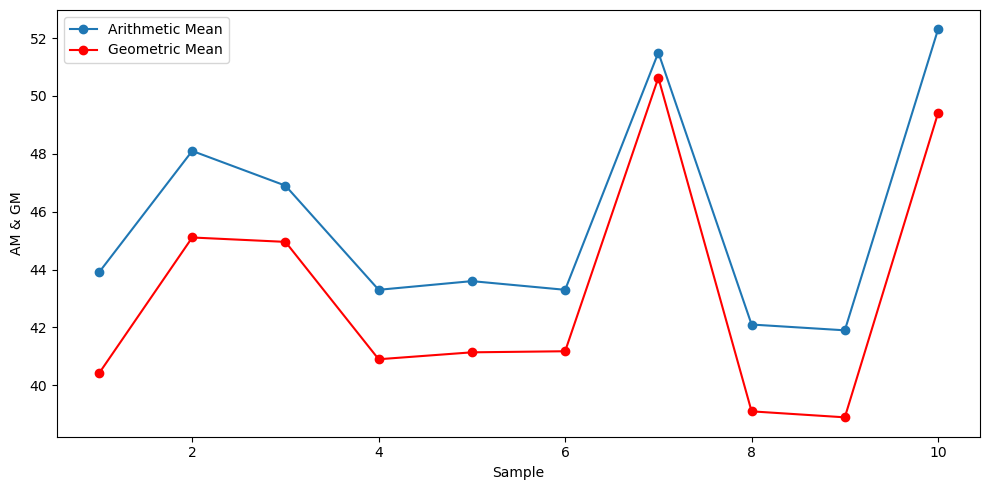

In [4]:
import math

def AM(L):
    return sum(L)/10

def GM(L):
    return (math.prod(L))**(1/10)

X = []
Y = []
Z = []
k=0
while k<10:
    L = []
    for i in range(0,10):
        n = random.randint(20,70)
        L.append(n)
    print("Sample no. ",k+1, ":",L)
    print("--> The arithmetic mean is", round(AM(L), 2))
    print("--> The geometric mean is", round(GM(L), 2))
    X = X+[k+1]
    Y = Y+[AM(L)]
    Z = Z+[GM(L)]
    k=k+1

# D = np.array(Y)-np.array(Z)

# print("The differences AM-GM are as follow:")
# print(D)

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.plot(X, Y, 'o-', label='Arithmetic Mean')
plt.plot(X, Z, 'o-', label='Geometric Mean', color='red')
plt.xlabel('Sample')
plt.ylabel('AM & GM')
plt.legend()

plt.show()

### Other Applications

Let us apply the convex function $f(x)=x^2$ on the arithmetic mean of two nonnegative integers.

\begin{equation*}
    f\left(\frac{a+b}{2}\right)=\left(\frac{a+b}{2}\right)^2\leq\frac{a^2+b^2}{2}
\end{equation*}
This reduces to
\begin{equation*}
    -\sqrt{2}\cdot(a^2+b^2)\leq a+b\leq\sqrt{2}\cdot(a^2+b^2).
\end{equation*}
These two inequalities can be easily derived by algebraic methods, but Jensen's theorem made it a one-step effort. Now, add the contraint $a^2+b^2=1$ to the number $a, b$; we are essentially looking at the unit circle centered at the origin. Without loss of generality, we may let $a=\cos\theta$ and $b=\sin\theta$. We obtain
\begin{equation*}
    -\sqrt{2}\leq\cos\theta+\sin\theta\leq\sqrt{2}
\end{equation*}
or
\begin{equation*}
    0\leq|\cos\theta+\sin\theta|\leq\sqrt{2}.
\end{equation*}
Interpreted as the lengths of the sides of a right-angled triangle whose hypothenuse is of unit length, this, along with the triangle inequality, says that
\begin{equation*}
    1\leq a+b\leq\sqrt{2},
\end{equation*}
that is, the sides added together are longer than hypothenuse by the triangle inequality, but that sum cannot exceed $\sqrt{2}$. This is a sharp bound because the maximum length of $\sqrt{2}$ is achieved when the triangle is isoceles. No derivative is involved.

In general, for $n$ data points, applying Jensen's inequality to $f(x)=x^2$ would result in
\begin{equation*}
    \left(\frac{a_1+a_2+\cdots+a_n}{n}\right)^2\leq\frac{a_1^2+a_2^2+\cdots+a_n^2}{n}
\end{equation*}
or
\begin{equation*}
\left\lVert\vec{a}\right\rVert_1=a_1+a_2+\cdots+a_n^2\leq\sqrt{n}\cdot\sqrt{a_1^2+a_2^2+\cdots+a_n^2}=\sqrt{n}\cdot\left\lVert\vec{a}\right\rVert_2.
\end{equation*}
Using Hölder's inequality, this can be easily generalized to
\begin{equation*}
\left\lVert\vec{a}\right\rVert_q\leq n^{\frac{1}{q}-\frac{1}{p}}\cdot\left\lVert\vec{a}\right\rVert_p
\end{equation*}
for all $p>q>1$ and $1/p+1/q=1$. (Exercise. Use $a_i"="a_i^p$ and $b_i=1$ on the left-hand side, smaller side of Hölder's inequality.) In addition, since $n^{\frac{1}{q}-\frac{1}{p}}$ tends to $\infty$ as $n$ tends to $\infty$, this inequality is only useful for finite sequences.

### References

1. Data Driven Science & Engineering (Machine Learning, Dynamical Systems, and Control), Steven L. Brunton & J. Nathan Kutz, Cambridge University Press, 2nd Edition, 2022.

2. The Cauchy-Schwarz Master Class (An Introduction to the Art of Mathematical Inequalities), J. Michael Steele, Cambridge University Press, 2004.